In [4]:
import numpy as np
import pandas as pd

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [28]:
# https://www.kaggle.com/c/nyc-taxi-trip-duration
trips = pd.read_csv("data/nyc-taxi-trip-duration-train.csv")

In [29]:
# for faster work (in real case skip this step and work with all data)
trips, _ = train_test_split(trips, test_size=0.9, random_state=42)

In [7]:
trips.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
151400,id2314990,1,2016-03-27 00:18:16,2016-03-27 00:31:17,1,-73.951561,40.770287,-73.990608,40.761036,N,781
1086547,id3308262,2,2016-05-09 14:19:31,2016-05-09 14:37:13,2,-74.003151,40.749149,-73.967758,40.768600,N,1062
569763,id3322666,2,2016-02-27 20:56:49,2016-02-27 21:17:04,1,-73.991402,40.735199,-73.962234,40.716179,N,1215
583246,id1221250,2,2016-06-07 00:37:32,2016-06-07 00:39:14,1,-73.987328,40.760448,-73.995911,40.764000,N,102
92419,id1979401,2,2016-04-04 21:25:52,2016-04-04 21:34:56,1,-73.980919,40.782318,-73.980858,40.762817,N,544


In [8]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145864 entries, 151400 to 121958
Data columns (total 11 columns):
id                    145864 non-null object
vendor_id             145864 non-null int64
pickup_datetime       145864 non-null object
dropoff_datetime      145864 non-null object
passenger_count       145864 non-null int64
pickup_longitude      145864 non-null float64
pickup_latitude       145864 non-null float64
dropoff_longitude     145864 non-null float64
dropoff_latitude      145864 non-null float64
store_and_fwd_flag    145864 non-null object
trip_duration         145864 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 13.4+ MB


In [9]:
for column in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']:
    print(trips[column].value_counts(), '\n')

2    78028
1    67836
Name: vendor_id, dtype: int64 

1    103277
2     21164
5      7761
3      5998
6      4817
4      2841
0         6
Name: passenger_count, dtype: int64 

N    145093
Y       771
Name: store_and_fwd_flag, dtype: int64 



In [10]:
trips.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,145864.000000,1.458640e+05
mean,1.534937,1.663673,-73.973456,40.750806,-73.973327,40.751688,9.613071e+02
std,0.498780,1.312011,0.038795,0.028301,0.036614,0.032551,5.924497e+03
min,1.000000,0.000000,-74.533875,40.436295,-74.613113,40.406036,1.000000e+00
25%,1.000000,1.000000,-73.991951,40.737141,-73.991287,40.735785,3.980000e+02
50%,2.000000,1.000000,-73.981812,40.753963,-73.979660,40.754486,6.640000e+02
75%,2.000000,2.000000,-73.967262,40.768258,-73.962944,40.769742,1.078000e+03
max,2.000000,6.000000,-72.421227,41.301289,-72.421227,41.301353,1.939736e+06


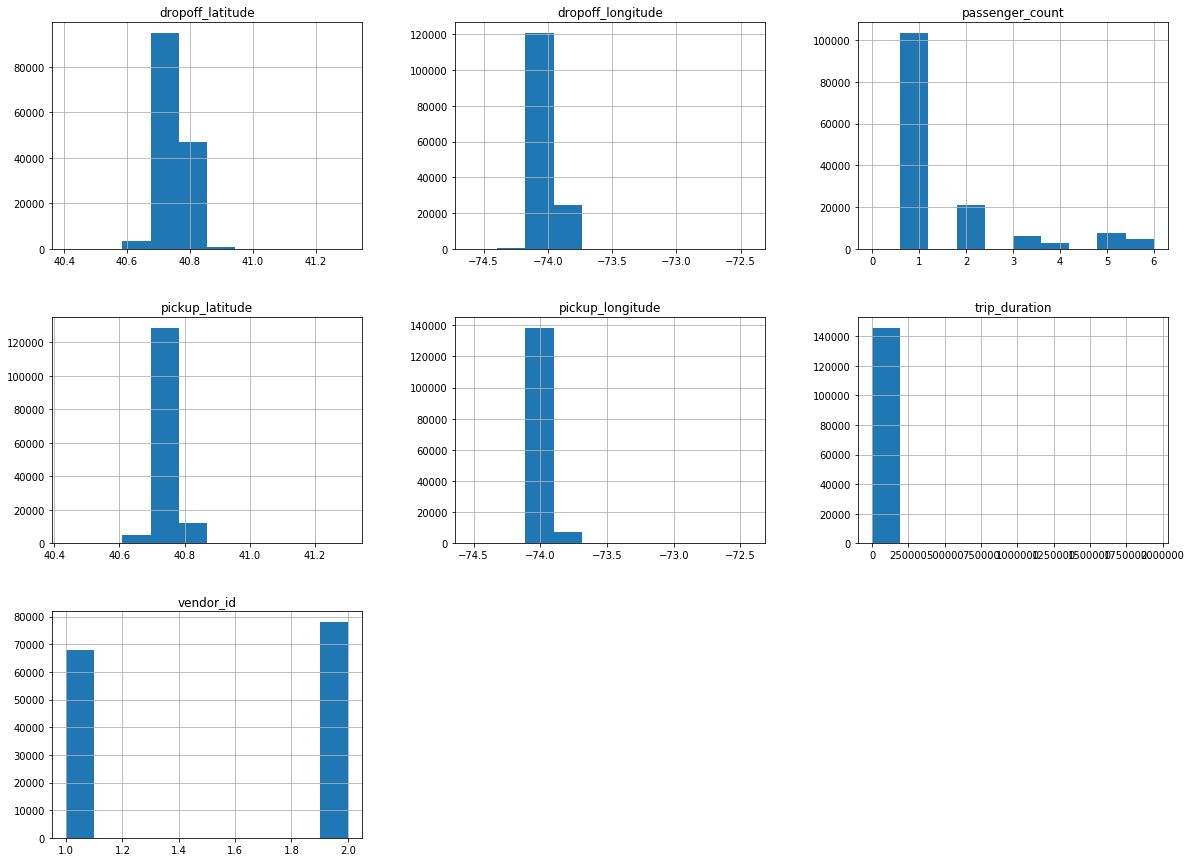

In [11]:
trips.hist(figsize=(20,15))
plt.show()

### Location processing

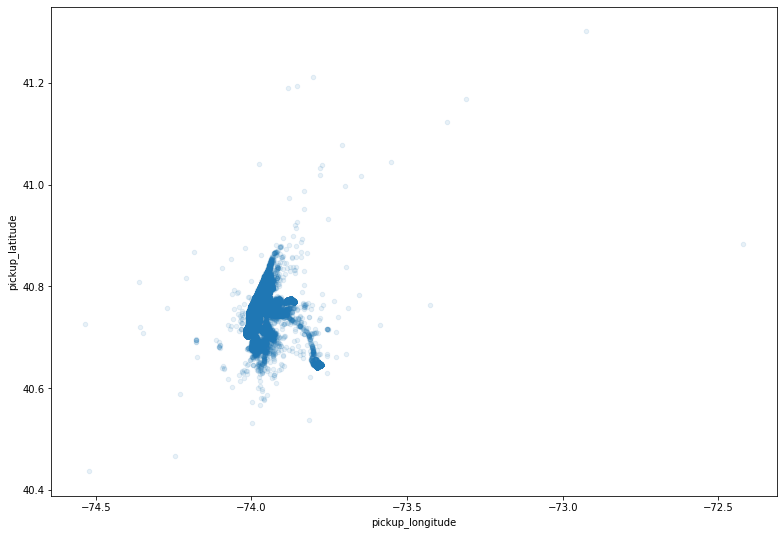

In [12]:
trips.plot(x="pickup_longitude",y="pickup_latitude", kind="scatter", alpha=0.1, figsize=(13,9))
plt.show()

In [13]:
# (min_longitude, max_longitude, min_latitude, max_latitude) 
box = (-74.2, -73.7, 40.6, 40.84)
nyc_map = plt.imread('data/nyc_map_-74.2_-73.7_40.6_40.84.png')

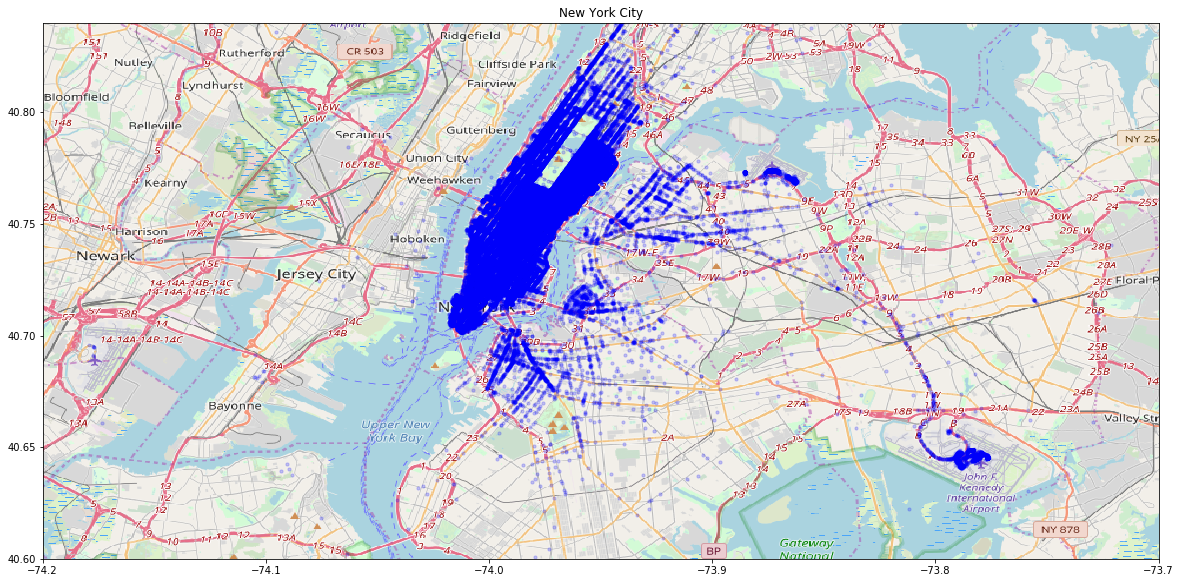

In [14]:
fig, ax = plt.subplots(figsize = (20,34))
ax.scatter(trips.pickup_longitude, trips.pickup_latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('New York City')
ax.set_xlim(box[0],box[1])
ax.set_ylim(box[2],box[3])
ax.imshow(nyc_map, zorder=0, extent = box)
plt.show()

# Feature selection

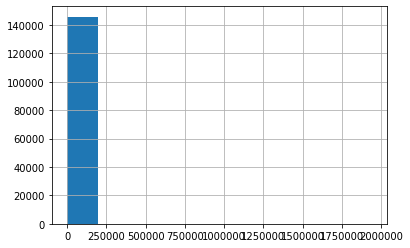

In [15]:
trips['trip_duration'].hist()

In [16]:
def get_normal_mask(features):
    mean, std = features.mean(), features.std()
    return features < mean + 2*std

In [17]:
normal_mask = get_normal_mask(trips['trip_duration'])
unnormal_trips = trips[normal_mask == False]

In [18]:
unnormal_trips.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,1.980000e+02
mean,1.994949,1.893939,-73.969870,40.743425,-73.972683,40.749643,9.006645e+04
std,0.071067,1.502574,0.048533,0.033882,0.035031,0.034201,1.329333e+05
min,1.000000,1.000000,-74.031662,40.631660,-74.031631,40.631672,1.548000e+04
25%,2.000000,1.000000,-73.993958,40.726708,-73.992308,40.735238,8.453550e+04
50%,2.000000,1.000000,-73.982582,40.747824,-73.981365,40.750761,8.577650e+04
75%,2.000000,2.000000,-73.965151,40.763495,-73.960217,40.767543,8.619725e+04
max,2.000000,6.000000,-73.776794,40.843845,-73.776360,40.863895,1.939736e+06


In [19]:
unnormal_trips[unnormal_trips['trip_duration'] > 10**5]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,1939736


In [20]:
trips = trips[normal_mask]

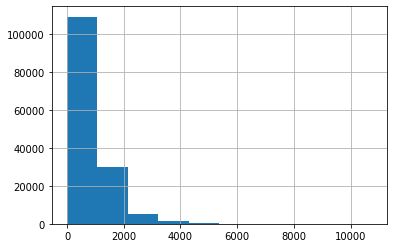

In [21]:
trips['trip_duration'].hist()

# Feature extraction

### Date processing

In [22]:
from datetime import datetime

In [23]:
print(trips['pickup_datetime'].min(), ' - ',trips['pickup_datetime'].max())

2016-01-01 00:01:01  -  2016-06-30 23:57:25


In [25]:
date_format = '%Y-%m-%d %X'

In [32]:
trips['pickup_datetime'] = trips['pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format)) 

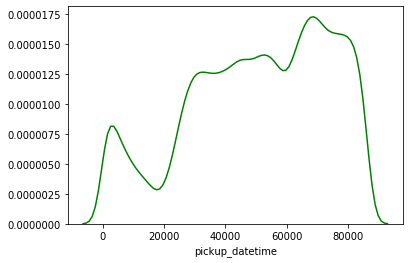

In [61]:
sns.distplot(trips['pickup_datetime'].apply(lambda x: (x.hour * 60 + x.minute) * 60 + x.second), color='g', hist = False, kde = True)

In [37]:
trips['day_of_month'] = trips['pickup_datetime'].apply(lambda x: x.day)

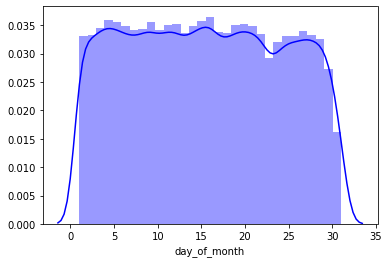

In [73]:
sns.distplot(trips['day_of_month'], color='b', bins=31)

In [38]:
trips['day_of_week'] = trips['pickup_datetime'].apply(lambda x: x.weekday())

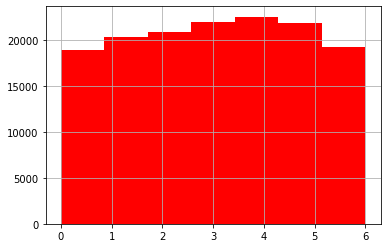

In [126]:
trips['day_of_week'].hist(color='r', bins=7)

In [39]:
trips['is_weekend'] = trips['day_of_week'].apply(lambda x: 1 if x in (5, 6) else 0)

In [40]:
trips['hour'] = trips['pickup_datetime'].apply(lambda x: x.hour)

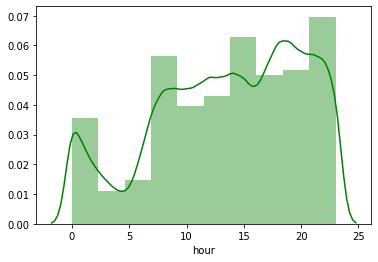

In [56]:
sns.distplot(trips['hour'], color='g', bins=10)

In [ ]:
#trips['traffic_per_hour'] = hour_count / count

### Location processing

In [43]:
trips['distance'] = np.sqrt(
    np.power(trips['pickup_longitude'] - trips['dropoff_longitude'], 2) +
    np.power(trips['pickup_latitude'] - trips['dropoff_latitude'], 2)
)

# Correlation

In [45]:
corr = trips.corr()

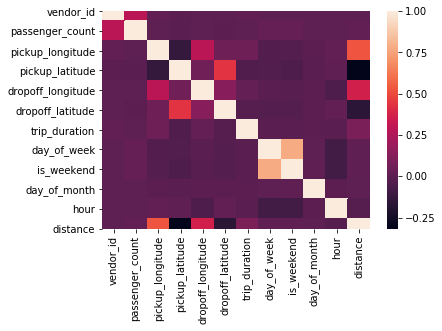

In [46]:
sns.heatmap(corr)

In [48]:
from pandas.plotting import scatter_matrix

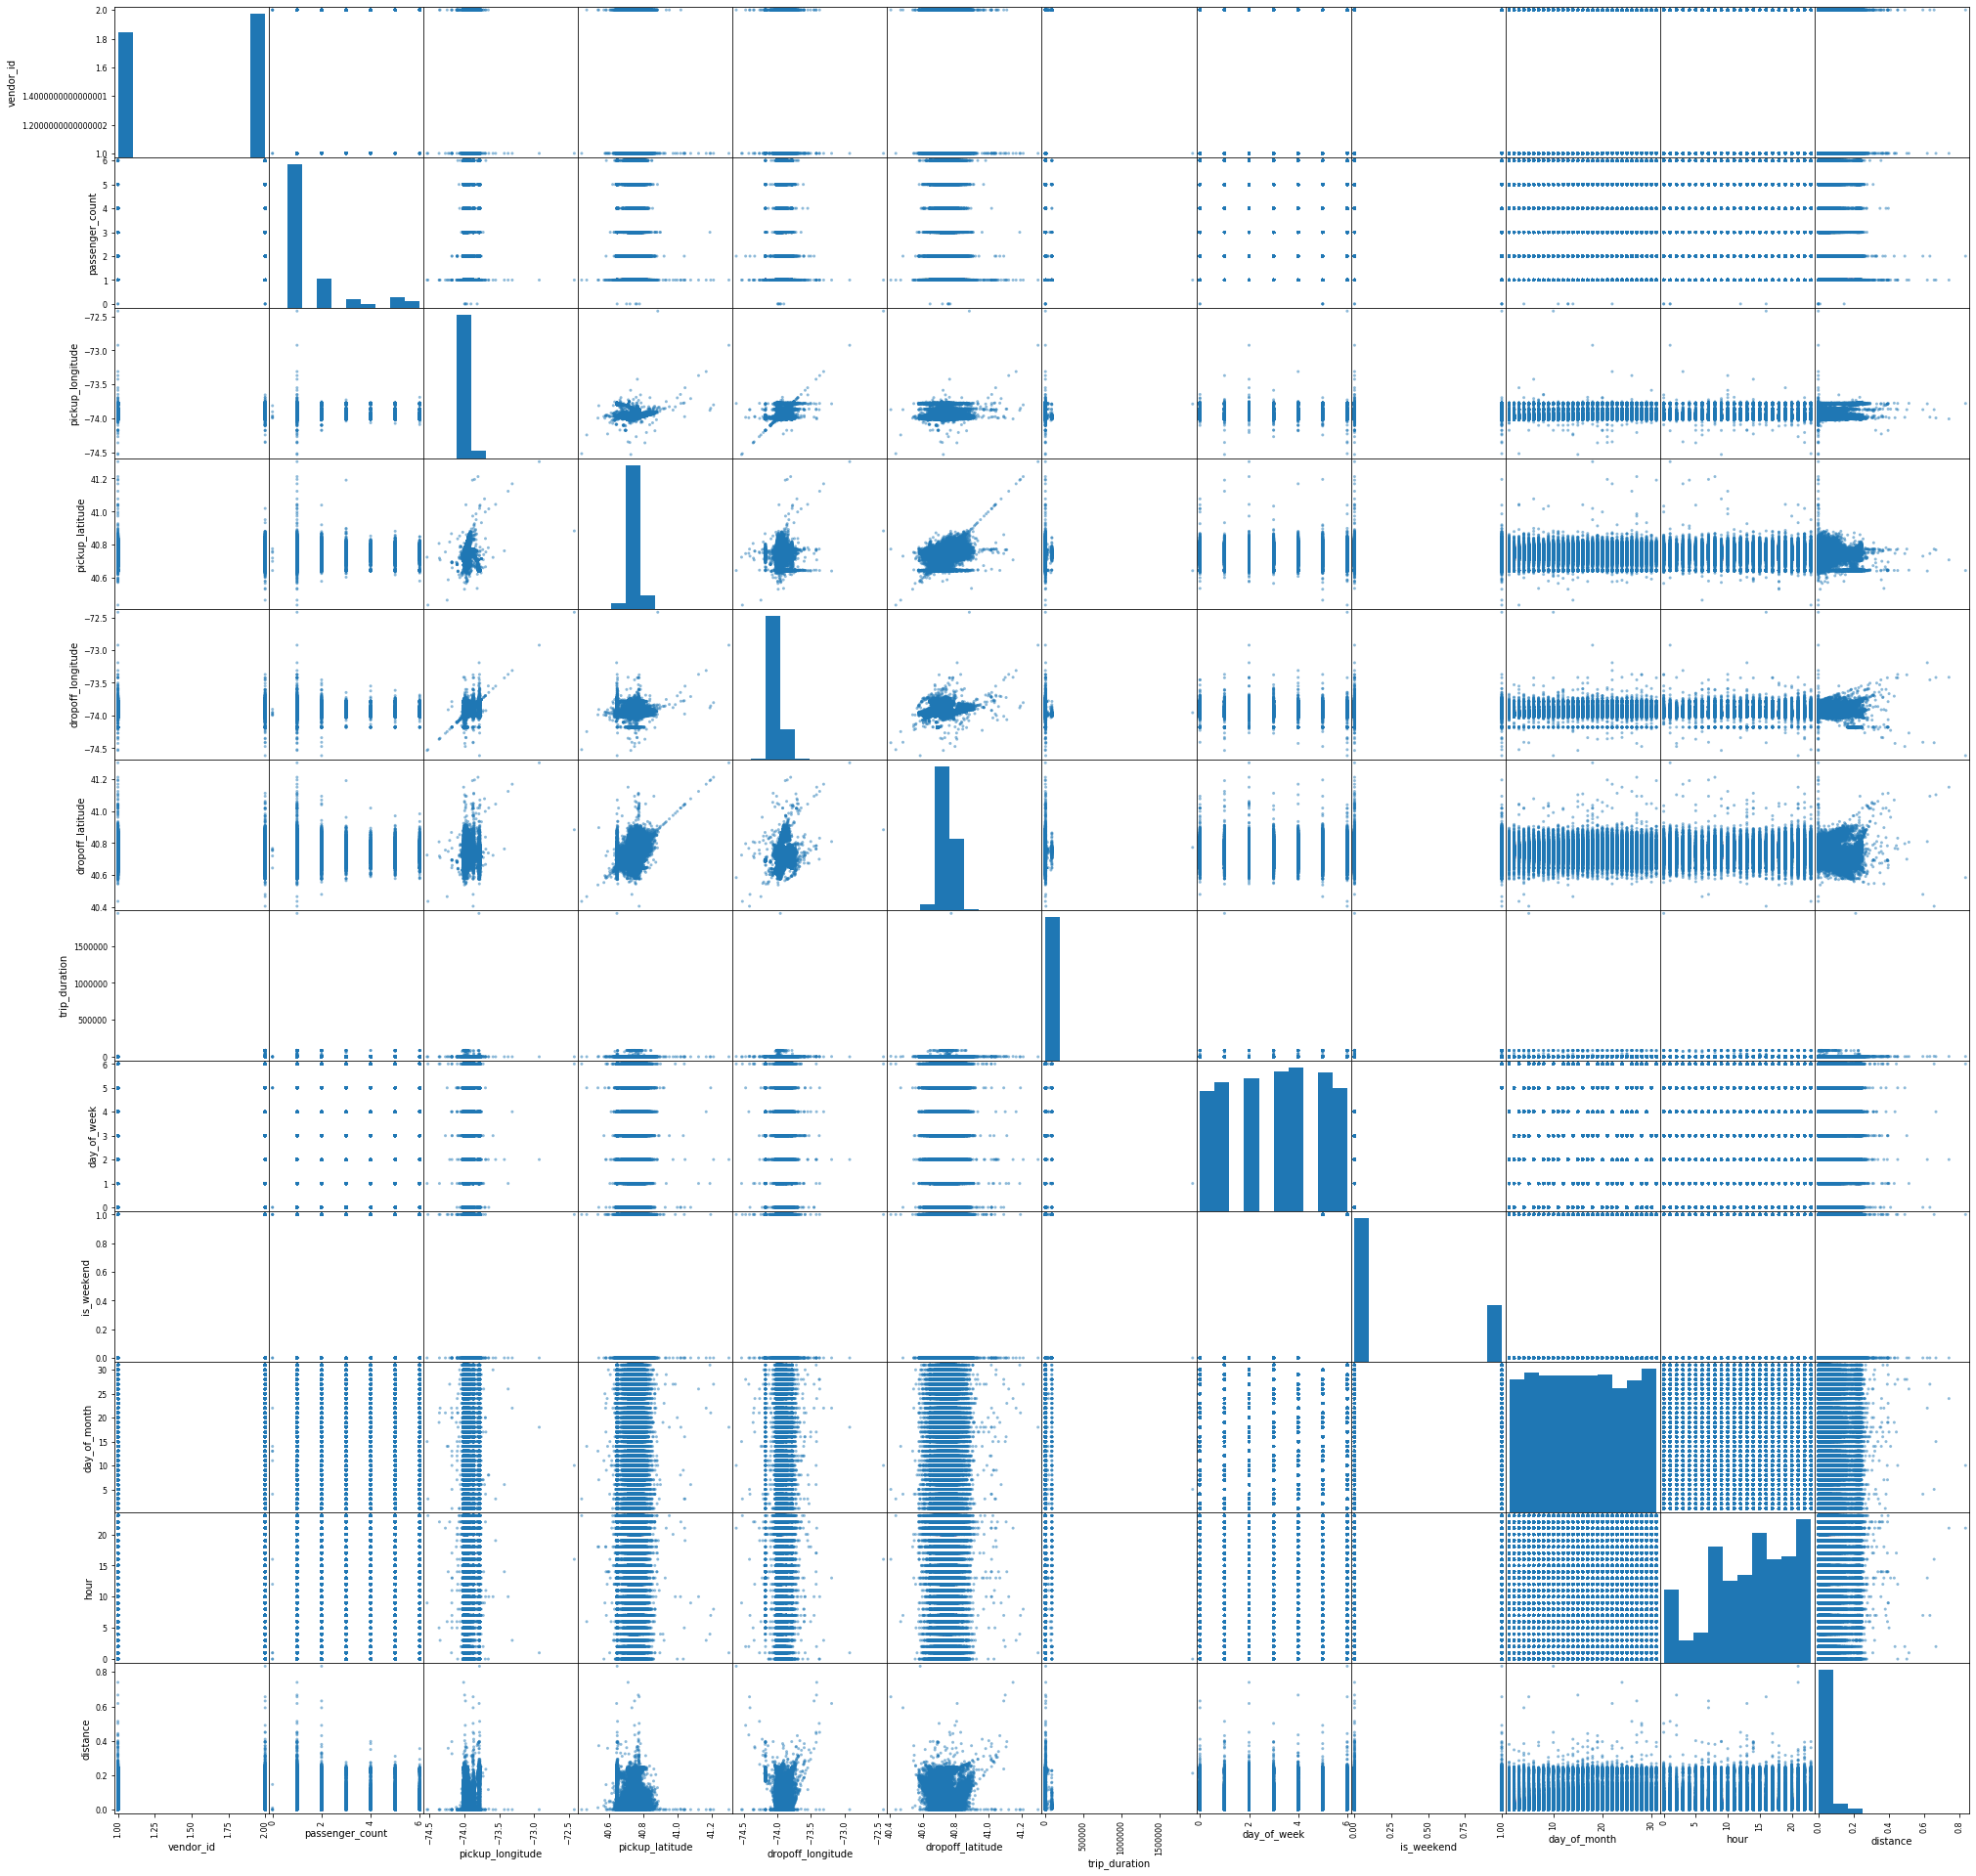

In [50]:
scatter_matrix(trips, figsize = (34,34))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258B654A108>,
      dtype=object)

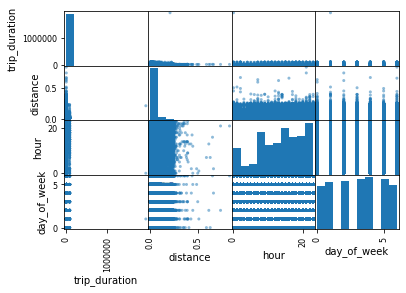

In [49]:
scatter_matrix(trips[['trip_duration','distance', 'hour', 'day_of_week']], figsize = (34,34))
plt.show()

# Model training

In [127]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [128]:
# columns_to_train = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'vendor_id', 'passenger_count']
columns_to_train = ['distance', 'hour', 'day_of_week', 'passenger_count', 'vendor_id']

In [129]:
X = trips[columns_to_train].copy()
y = trips['trip_duration'].copy()

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
print(regressor.intercept_)

171.66774633542025


In [133]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
distance,12276.028493
hour,2.546657
day_of_week,-6.422295
passenger_count,0.676676
vendor_id,214.769431


### Training with pipeline

In [134]:
def add_extra_features(X):
    return X;

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [136]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

In [137]:
num_attribs = ['distance', 'hour', 'day_of_week', 'passenger_count']
# cat_attribs = ["vendor_id"]
cat_attribs = []

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(categories='auto'), cat_attribs),
    ])

trips_prepared = full_pipeline.fit_transform(trips[num_attribs + cat_attribs])

In [138]:
trips_prepared[0]

array([ 0.10809832, -2.12517314,  1.51548384, -0.50584596])

In [139]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(trips_prepared, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [140]:
coeff_df = pd.DataFrame(lin_reg.coef_, num_attribs, columns=['Coefficient'])  
coeff_df

,Coefficient
distance,576.091586
hour,-10.686490
day_of_week,-24.339493
passenger_count,18.405179


# Model evaluation

In [141]:
y_pred = regressor.predict(X_test)

In [142]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 486.2975413831513
Mean Squared Error: 135811961.88970107
Root Mean Squared Error: 11653.838933574682


In [143]:
y_pred = lin_reg.predict(full_pipeline.fit_transform(X_test))

In [144]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 477.02783513046313
Mean Squared Error: 135768299.77520245
Root Mean Squared Error: 11651.965489787655


In [145]:
print('Mean Squared Logarithmic Error:', metrics.mean_squared_log_error(y_test, y_pred)) 

Mean Squared Logarithmic Error: 0.4150383092676459


In [146]:
print('r2 score:', metrics.r2_score(y_test, y_pred)) 

r2 score: 0.004178658483254938


In [158]:
a =full_pipeline.fit_transform(X_test)[1:10]

In [159]:
y_pred = lin_reg.predict(a)

In [163]:
pd.DataFrame(y_pred, y_test[1:10].values)

,0
423,678.075278
309,668.658368
1434,938.712199
2022,2098.842612
1766,1348.410760
1443,980.721220
263,544.601631
778,750.360831
869,952.625528
